# I. HÁZI FELADAT

Ezt a feladatsort tetszőleges programozási nyelven meg lehet oldani, de a forráskódot minden esetben mellékelni kell. A python és octave megoldások programkódja kerülhet a jupyter notebookba. A programok legyenek modulárisak, használjanak függvényeket! A kimeneti adatok ábrázolásához minden esetben használjuk a jupyter notebookot! Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat!

# Függvényillesztés a lineáris $\chi^2$ módszerrel


A lineáris $\chi^2$-illesztés módszere olyan modellek paramétereinek meghatározására alkalmas, ahol az illesztendő függvény felírható tetszőleges függvények lineárkombinációjaként, feltéve, hogy az illesztési paraméterek csak a lineárkombináció együtthatóinak szerepét töltik be, vagyis

$$ y(\mathbf{a}, \mathbf{x}) = \sum_k a_k f_k(\mathbf{x}), $$

ahol $\mathbf{a}$ a keresett paraméterekből alkotott vektor vektor, $\mathbf{x}$ pedig a független változó. További feltétel, hogy az $f_k(\mathbf{x})$ többváltozós függvények az összes $\textbf{x}$ mérési pontban kiértékelhetők legyenek. Amennyiben a mérési hiba gauss-i, úgy az $y_i$ mért értékek hibáját egy $\sigma_i$ értékkel jellemezhetjük, ahol az $i$ index a mérési pontokon fut. A függvényillesztés jóságát a

$$
\chi^2(\mathbf{a})
    = \sum_i \frac{\left[ y(\mathbf{a}, \mathbf{x}_i) - y_i \right]^2}{\sigma_i^2}
    = \sum_i \frac{\left[ \sum_k a_k f_k(\mathbf{x}_i) - y_i \right]^2}{\sigma_i^2}
$$

mennyiséggel jellemezhetjük, mely Gauss-eloszlású hiba esetében egzaktul következik a _maximum likelihood_ módszerből. A legjobban illeszkedő modellre a $\chi^2$ kifejezésének értéke minimális, azaz azokat az $a_k$ paramétereket keressük, melyek mellett $\chi^2$ parciális deriváltjai eltűnnek:

$$
\frac{\partial\chi^2(\mathbf{a})}{\partial a_k} = 0
$$

minden $a_k$-ra. A parciális deriváltakra így felírt egyenletrendszer általában nem lineáris, így a megoldására közvetlen gyökkereső módszerekkel nem sok esélyünk van. Amennyiben azonban az $y(\mathbf{a}, \mathbf{x})$ modellt a fent bevezett lineárkombináció alakjában adjuk meg, úgy könnyen belátható, hogy a deriváltak nullává tétele a kövezkező egyenletrendszerre vezet:

$$
\frac{\partial\chi^2(\mathbf{a})}{\partial a_k} =
    2 \cdot \sum_i \left[ \frac{1}{\sigma_i^2} \cdot 
        \left( 
            \sum_j a_j f_j(\mathbf{x}_i) - y_i
        \right) \cdot f_k(\mathbf{x}_i) \right] = 0.
$$

Ez már lineáris egyenletrendszer az $a_k$ együtthatókra, hiszen az $y_i$ mért értékek és az $f_k(\mathbf{x}_i)$ bázisfüggvények az $\mathbf{x}_i$ mérési pontokban ismertek. Könnyű belátni, hogy némi átírás után bevezethető egy $X_{ik}$, ún. tervmátrix, és egy $b_i$ hibával redukált vektor:

$$
X_{ik} = \frac{f_k(\mathbf{x}_i)}{\sigma_i} \quad \quad \quad
b_i = \frac{y_i}{\sigma_i}.
$$

A parciális deriváltak nullává tételével felírt egyenletrendszer ezekkel a jelölésekkel

$$
\frac{\partial\chi^2(\mathbf{a})}{\partial a_k} =
    \sum_i \left[ \left( \sum_j a_j X_{ij} - b_i \right) X_{ik} \right] = 0
$$

alakúnak adódik, mely átrendezés után 

$$
\sum_i \sum_j X_{ij} X_{ik} a_j  = \sum_i X_{ik} b_i,
$$

vagy mátrixos írásmóddal

$$
\mathbf{X}^{T} \mathbf{X} \mathbf{a} = \mathbf{X}^{T} \mathbf{b}
$$

alakot ölt. Az egyenletet $\mathbf{a}$-ra megoldva megkapjuk a $\chi^2$-et minimalizáló paramétereket.

## A redukált $\chi^2$

Mivel a $\chi^2$-re felírt kifejezés függ a mérési pontok számától, ezért a $\chi^2$ értéke nem használható arra, hogy két, különböző mérési sorozat esetében megállapítsuk, hogy ugyanaz a modell mennyire jól illeszkedik az egyik vagy másik adatsorra. Éppen ezért érdemes bevezetni a redukált $\chi^2$ nevű mennyiséget:

$$
\chi^2_\nu = \frac{\chi^2}{\nu},
$$

ahol $\nu = N - M$ a szabadsági fokok száma, azaz a mérési adatpontok száma mínusz az illesztendő paraméterek száma. Jó illesztésről akkor beszélhetünk, ha $\chi^2_\nu \approx 1$.

## Az illesztett paraméterek aszimptotikus hibája

A lineáris $\chi^2$ módszerrel illesztett modellek paramétereinek hibáját úgy becsülthetjük meg, hogy tekintjük a $\chi^2(\mathbf{a})$ függvény második parciális deriváltjaiból alkotott mátrixot, hiszen a $\chi^2$ kifejezésének Taylor-sorában az ennek megfelelő tag nem tűnik el minimum környezetében. Tekintve, hogy

$$
\frac{\partial^2 \chi^2(\mathbf{a})}{\partial a_k \partial a_l} =
    \sum_i X_{ij} X_{ik} = \sum_i \frac{f_k(\mathbf{x}_i) f_l(\mathbf{x}_i)}{\sigma_i^2} =
    \alpha_{kl},
$$

az így bevezett $\mathbf{\alpha} = \mathbf{X}^{T} \mathbf{X}$ szimmetrikus mátrixról belátható, hogy annak $\mathbf{C} = \mathbf{\alpha}^{-1}$ inverze, az ún. kovarianciamátrix, jól jellemzi az illesztett paraméterek hibáját és kovarianciáját. Az $a_k$ paraméter hibája egyszerűen $\sigma_{a_k}^2 = C_{kk}$, míg az $a_k$ és $a_l$ paraméterek kovarianciája a $ \textrm{cov}(a_k, a_l) = C_{kl}$ mátrixelem. Az így kiszámított hibák ún. aszimptotikus hibák, hiszen csupán a $\chi^2$ felület másodrendű közelítését veszik figyelembe a minimumhely környezetében.

## Hibabecslés a bootstrap módszerrel

Az illesztett paraméterek hibájának pontos megbecslését olyan Monte Carlo módszerrel végezhetnénk el, mely képes mintavételezni az illesztési paraméterek pontos $p(\mathbf{a})$ együttes eloszlásfüggvényét. Ehelyett egy gyakran használt, egyszerűbb, de igen hasznos eljárás a [bootstrap](https://outdoors.stackexchange.com/questions/11709/whats-the-purpose-of-the-sling-on-the-heel-of-boots) módszer, ahol az illesztést a mérési adatok egy véletlen részhalmazára (pl. egyharmadára) végezzük el, majd egy másik véletlen részhalmazt választunk, mellyel ismét elvégezzük az illesztést, és így tovább. Kellően sokszor megismételve az eljárást az illesztési paraméterekre egy-egy eloszlást kapunk, melyeknek meghatározhatjuk a várható értékét, szórását és kovarianciáit. A legjobban illeszkedő modellparamétereknek tekinthetjük az eloszlások várható értékét, míg illesztési hibának a szórásukat.


## Irodalomjegyzék

* Press, Teukolsky, Vetterling & Flannery: Numerical Recipes (in C), 3. kiadás, Cambridge University Press, 15.4. fejezet

# Feladatok

## 1. feladat

Az alábbi függvény egy véletlenszerű adatsort generál. Írjunk rövid programot, mely az adatokra parabolát illeszt! A program ne beépített függvényillesztő rutint használjon, hanem végezze el a számolást a fent definiált $X_{ij}$ mátrix előállításával, és felírt lineáris egyenletrendszer megoldásával! Az egyenletrendszer megoldására tetszőleges függvénykönyvtár használható. Ábrázoljuk az adatokat és az eredményt! Próbáljuk meg úgy megírni a programot, hogy az tetszőleges fokszámú polinom illesztésére is alkalmas legyen! Számítsuk ki a legjobban illeszkedő modell esetében a redukált $\chi^2$ értékét!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def some_random_coeffs():
    a = 10 * np.random.rand() - 2.5
    b = 20 * np.random.rand() - 5
    c = 100 * np.random.rand() - 50
    return a, b, c

def some_random_data(a, b, c, N):
    x = np.linspace(-N, N, 2 * N + 1)
    sigma = 10 * (np.random.rand(x.shape[0]) + 1)
    y = np.random.normal(a * x**2 + b * x + c, sigma)
    return x, y, sigma

def random_data_with_outliers(a, b, c, N, M):
    x, y, sigma = some_random_data(a, b, c, N)
    idx = np.random.randint(0, 2 * N, M)
    y[idx] = np.min(y) + np.random.rand() * (np.max(y) - np.min(y))
    return x, y, sigma

In [46]:
a, b, c = some_random_coeffs()
x, y, sigma = some_random_data(a, b, c, 10)
np.savetxt('adatsor.txt', np.transpose([x, y, sigma]))

array([573.70733378, 457.07946308, 366.46994032, 296.11807674,
       211.01990365, 115.29765261,  96.21744563,   8.91629983,
       -41.28058657, -12.2063445 , -50.4336803 , -17.55988487,
       -16.98446914,  27.88403917,  66.15440868,  92.55179757,
       147.91152046, 230.1535609 , 340.3470697 , 430.96241331,
       533.05191838])

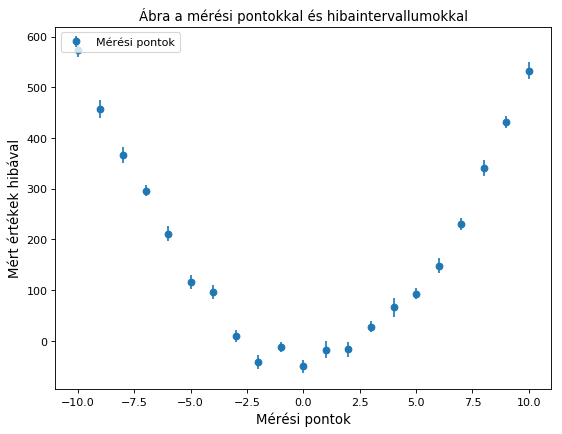

In [52]:
# ábra a mérési pontokkal és hibaintervallumokkal

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar(x,y,sigma,linestyle='',marker='o', label='Mérési pontok')


plt.title("Ábra a mérési pontokkal és hibaintervallumokkal")
plt.xlabel('Mérési pontok', fontsize = '12')
plt.ylabel('Mért értékek hibával', fontsize = '12')
plt.legend(loc='upper left')

#### Feladat megértése

M oszlop amin a k index fut végig tehát ahány bázis fv van

##### Matrix

\begin{equation*}
\begin{vmatrix}
\frac{f_0x_0}{\sigma_0} &  \frac{f_0x_0}{\sigma_0} & ... \\
\frac{f_0x_1}{\sigma_1} &  \frac{f_1x_1}{\sigma_1} & ... \\
... &  ... & ...
\end{vmatrix}
\end{equation*}

<!---
f0x0/sigma0 f1x0/sigma0
f0x1/sigma1 f1x1/sigma1
-->

##### Bázis függvények

\begin{equation*}
f_0(x)=1 \\
f_1(x)=x \\
f_2(x)=x^2 \\
...
\end{equation*}

</br>

In [4]:
# az illesztést elvégző program helye
def fit(x, y, sigma):
    M=np.empty((np.shape(x)[0],3))
    Msigma=np.empty((np.shape(x)[0],3))

    for i in range(3):
        M[:,i]=x**i

    for j in range(3):
        Msigma[:,j]=M[:,j]/sigma

    b = y/sigma
    a = np.linalg.solve(np.dot(Msigma.transpose(),Msigma), np.dot(Msigma.transpose(),b))
    
    # a redukált chi^2 értéke a legjobban illeszkedő modell esetére
    khi2 = sum((np.dot(M,a)-y)**2/sigma**2)
    khi2_redukalt = khi2/(x.shape[0]-len(a))
    
    residual  = abs((np.dot(M,a))-y)
    
    return a, M, Msigma, khi2, khi2_redukalt, residual

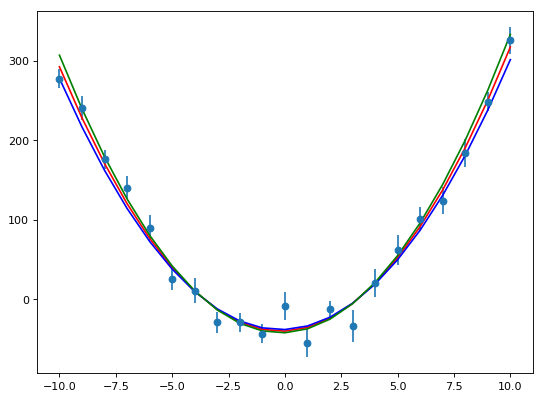

In [5]:
# ábra a legjobban illeszkedő modellel és néztük kis eltérésekre mennyire fog elromlani
result = fit(x, y, sigma)
M = result[1]
a = result[0]
a2 = np.array([a[0]*0.95,a[1]*0.95,a[2]*0.95]) # itt kis eltérésekre néztünk
a3 = np.array([a[0]*1.05,a[1]*1.05,a[2]*1.05]) # nem a feladat része

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.errorbar(x,y,sigma,linestyle='',marker='o')
plt.plot(x,np.dot(M,a), "r")
plt.plot(x,np.dot(M,a2), "b")
plt.plot(x,np.dot(M,a3), "g")

(17.744565194560696, 0.9858091774755943)

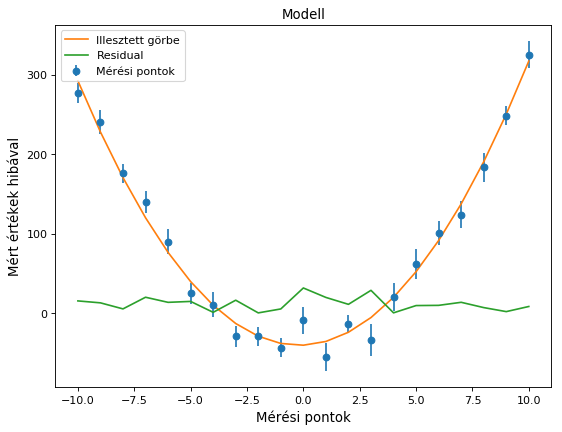

In [6]:
# a redukált chi^2 értéke a legjobban illeszkedő modell esetére
result = fit(x, y, sigma)
a = result[0]
M = result[1]
khi2 = result[3]
khi2_redukalt = result[4]
residual = result[5]

def plot_fit(x, y, sigma, residual, a, M, title_string, legend=True):
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.errorbar(x,y,sigma,linestyle='',marker='o', label='Mérési pontok')
    plt.plot(x,np.dot(M,a), label='Illesztett görbe')
    plt.plot(x,residual, label='Residual')
    
    plt.title(title_string)
    plt.xlabel('Mérési pontok', fontsize = '12')
    plt.ylabel('Mért értékek hibával', fontsize = '12')
    
    if(legend==True):
        plt.legend(loc='upper left')
    
plot_fit(x, y, sigma, residual, a, M, "Modell")
khi2, khi2_redukalt

## 2. feladat

Az alábbi függvényhívás olyan adatsort generál, amely kilógó (a megadott hibaértékkel nem jól jellemzett, vagy sok szigma értékkel eltérő) adatpontokat is tartalmaz. Írjunk programot, mely a $3\sigma$-nál jobban kilógó pontok elhagyásával, két lépésben, illetve iteratív módon végzi el a parabolaillesztést!

In [7]:
a, b, c = some_random_coeffs()
x, y, sigma = random_data_with_outliers(a, b, c, 10, 3)

In [21]:
# mindig kiveszi a legnagyobb eltérésű elemet
def filter_max_difference(x, y, sigma, a, M):
    I = abs((np.dot(M,a))-y)/(sigma*3)
    X = np.concatenate((x[:np.argmax(I)],x[np.argmax(I)+1:]))
    Y = np.concatenate((y[:np.argmax(I)],y[np.argmax(I)+1:]))
    SIGMA = np.concatenate((sigma[:np.argmax(I)],sigma[np.argmax(I)+1:]))
    print(I)
    return X, Y, SIGMA

# 3 sigmanál jobban kilógó pontokat elhagyjuk
def filter_max_difference2(x, y, sigma, a, M):
    I = abs((np.dot(M,a))-y)/(sigma)
    m = I < 3
    X = x[m]
    Y = y[m]
    SIGMA = sigma[m]
    return X, Y, SIGMA, m.shape[0] == sum(m)

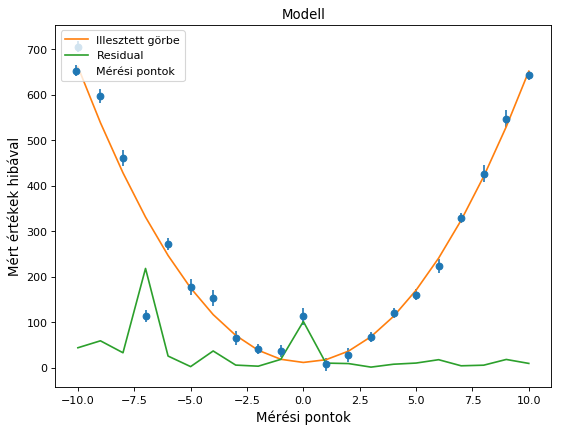

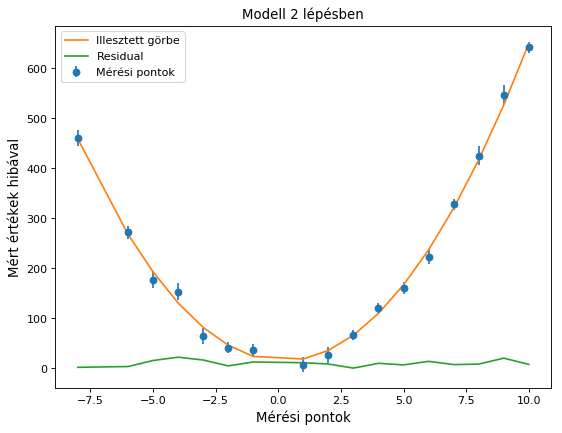

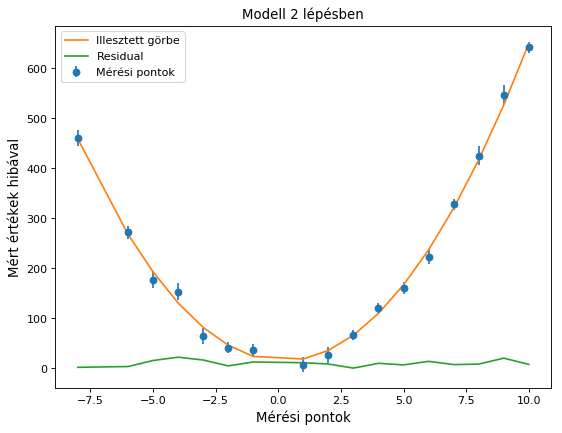

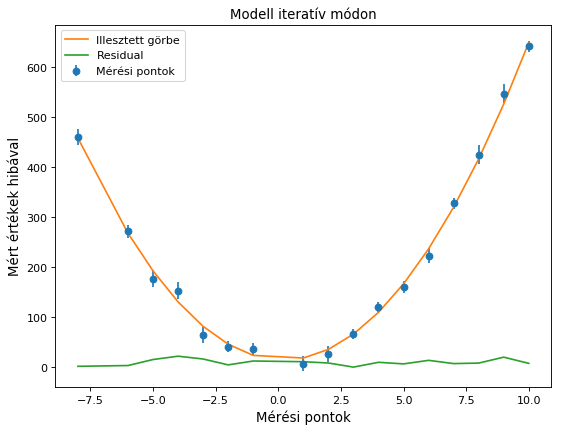

In [22]:
def fitandplot(x, y, sigma):
    result = fit(x, y, sigma)
    a = result[0]
    M = result[1]
    residual = result[5]
    
    plot_fit(x, y, sigma, residual, a, M, "Modell")
        
    # 2 lépésben
    for i in range(2):
        RESULT = filter_max_difference2(x, y, sigma, a, M)
        x = RESULT[0]
        y = RESULT[1]
        sigma = RESULT[2]

        result = fit(x, y, sigma)
        a = result[0]
        M = result[1]
        khi2 = result[3]
        khi2_redukalt = result[4]
        residual = result[5]
        plot_fit(x, y, sigma, residual, a, M, "Modell 2 lépésben")
        
    # iterálva
    while True:
        RESULT = filter_max_difference2(x, y, sigma, a, M)
        x = RESULT[0]
        y = RESULT[1]
        sigma = RESULT[2]    
        a = result[0]
        M = result[1]
        khi2 = result[3]
        khi2_redukalt = result[4]
        residual = result[5]
        plot_fit(x, y, sigma, residual, a, M, "Modell iteratív módon")
        if RESULT[3]:
            return a
        result = fit(x, y, sigma)

a = fitandplot(x, y, sigma)

Text(0, 0.5, 'Mért értékek hibával')

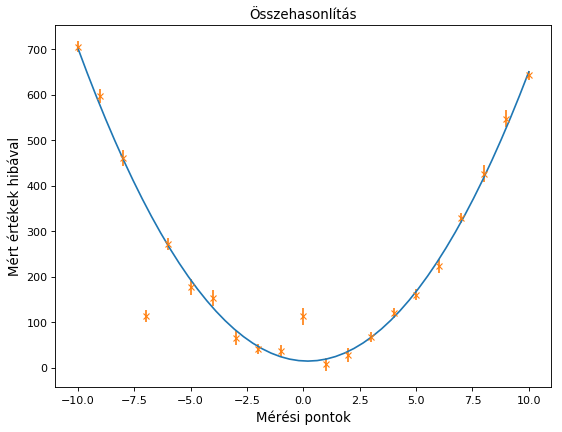

In [24]:
# Végső összehasonlítás
def function(x, a):
    return a[0] + a[1] * x + a[2] * x * x

xs = np.linspace(x.min(), x.max(), 50)

plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(xs, function(xs, a))
plt.errorbar(x, y, sigma, fmt = 'x')
plt.title('Összehasonlítás')
plt.xlabel('Mérési pontok', fontsize = '12')
plt.ylabel('Mért értékek hibával', fontsize = '12')

## 3. feladat

Írjuk függvényt, mely meghatározza az illesztett paraméterek aszimptotikus hibáját és kovarianciáját.

## Az illesztett paraméterek aszimptotikus hibája

A lineáris $\chi^2$ módszerrel illesztett modellek paramétereinek hibáját úgy becsülthetjük meg, hogy tekintjük a $\chi^2(\mathbf{a})$ függvény második parciális deriváltjaiból alkotott mátrixot, hiszen a $\chi^2$ kifejezésének Taylor-sorában az ennek megfelelő tag nem tűnik el minimum környezetében. Tekintve, hogy

$$
\frac{\partial^2 \chi^2(\mathbf{a})}{\partial a_k \partial a_l} =
    \sum_i X_{ij} X_{ik} = \sum_i \frac{f_k(\mathbf{x}_i) f_l(\mathbf{x}_i)}{\sigma_i^2} =
    \alpha_{kl},
$$

az így bevezett $\mathbf{\alpha} = \mathbf{X}^{T} \mathbf{X}$ szimmetrikus mátrixról belátható, hogy annak $\mathbf{C} = \mathbf{\alpha}^{-1}$ inverze, az ún. kovarianciamátrix, jól jellemzi az illesztett paraméterek hibáját és kovarianciáját. Az $a_k$ paraméter hibája egyszerűen $\sigma_{a_k}^2 = C_{kk}$, míg az $a_k$ és $a_l$ paraméterek kovarianciája a $ \textrm{cov}(a_k, a_l) = C_{kl}$ mátrixelem. Az így kiszámított hibák ún. aszimptotikus hibák, hiszen csupán a $\chi^2$ felület másodrendű közelítését veszik figyelembe a minimumhely környezetében.

In [11]:
# a szórások és aszimptotikus hibák meghatározása
# Hesse matrix
Msigma = fit(x, y, sigma)[2]
a = fit(x, y, sigma)[0]

C = np.linalg.inv(2*np.dot(Msigma.transpose(),Msigma))
a, C

(array([11.4263457 , -0.48996489,  6.44708856]),
 array([[ 9.20217595e+00, -4.58020115e-02, -1.34552486e-01],
        [-4.58020115e-02,  1.17943178e-01, -3.88479751e-04],
        [-1.34552486e-01, -3.88479751e-04,  3.69387768e-03]]))

In [12]:
# polyfit beépített fv-el ellenőrzés, hogy milyen érték jön ki
np.polyfit(x, y, 2, rcond=None, full=False, w=None, cov=True)

(array([ 6.42630506, -0.53945539, 15.85585289]),
 array([[ 1.87783686e-01,  1.11055683e-16, -6.88540181e+00],
        [ 1.11055683e-16,  5.47076471e+00, -3.61231048e-15],
        [-6.88540181e+00, -3.61231048e-15,  4.53059439e+02]]))

## 4. feladat

Határozzuk meg a kilógó pontokat is tartalmazó adatsor esetében az illesztett parabola paramétereinek eloszlását és hibáját a bootstrap módszer segítségével. A bootstrap eljárás során az illesztést többször megismételjük oly módon, hogy mindig csak a mérési pontok egy véletlen részhalmazát (pl. 60%-át) használjuk fel az illesztéshez. Az így kapott illesztési paraméterekből készítsünk hisztogramot, valamint számítsuk ki a paraméterek várható értékét és szórását! Hasonlítsuk össze a kapott értékeket a kovarianciamátrixból számolt aszimptotikus hibával.

## Hibabecslés a bootstrap módszerrel

Az illesztett paraméterek hibájának pontos megbecslését olyan Monte Carlo módszerrel végezhetnénk el, mely képes mintavételezni az illesztési paraméterek pontos $p(\mathbf{a})$ együttes eloszlásfüggvényét. Ehelyett egy gyakran használt, egyszerűbb, de igen hasznos eljárás a [bootstrap](https://outdoors.stackexchange.com/questions/11709/whats-the-purpose-of-the-sling-on-the-heel-of-boots) módszer, ahol az illesztést a mérési adatok egy véletlen részhalmazára (pl. egyharmadára) végezzük el, majd egy másik véletlen részhalmazt választunk, mellyel ismét elvégezzük az illesztést, és így tovább. Kellően sokszor megismételve az eljárást az illesztési paraméterekre egy-egy eloszlást kapunk, melyeknek meghatározhatjuk a várható értékét, szórását és kovarianciáit. A legjobban illeszkedő modellparamétereknek tekinthetjük az eloszlások várható értékét, míg illesztési hibának a szórásukat.

In [27]:
# a bootstrap módszer megvalósítása

# arrayből egy random ismétlés nélküli valamekkora arrayt generál
def get_subsample(x, sample_size):
    return np.random.choice(x, sample_size, replace=False)

# gyüjtünk n darab mintát az arrayból
def collect_samples(x, sample_size, n_samples):
    samples = np.zeros((n_samples, sample_size))
    for i in range(0, n_samples):
        sample = get_subsample(x, sample_size)
        samples[i] = sample
        
    return samples

# tényleges minták gyűjtése x, y, sigma-ból
n_samples = 1000
xB = collect_samples(x, int(x.shape[0]*0.6), n_samples)
yB = collect_samples(y, int(x.shape[0]*0.6), n_samples)
sigmaB = collect_samples(sigma, int(x.shape[0]*0.6), n_samples)

a = np.zeros((n_samples, 3))
for i in range(0, n_samples):
    a[i] = fit(xB[i], yB[i], sigmaB[i])[0]
#a[0], xB[0], yB[0], sigmaB[0]

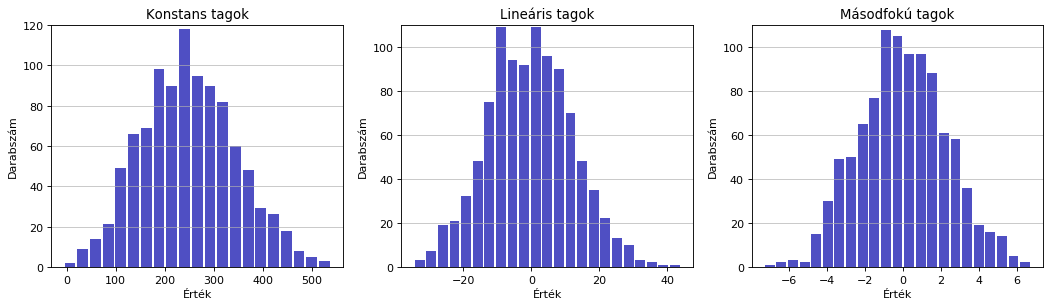

In [28]:
# a bootstrap módszerrel kapott illesztési paraméterek eloszlása -- ábrák
def plot_hist(x, title):
    n, bins, patches = plt.hist(x=x, bins='auto', color='#0504aa',
                                alpha=0.7, rwidth=0.85)

    plt.grid(axis='y', alpha=0.75)
    plt.xlabel('Érték')
    plt.ylabel('Darabszám')
    plt.title(title)
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim(top=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    
plt.figure(num=None, figsize=(16, 4), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,3,1)
plot_hist(a[:,0], 'Konstans tagok')
plt.subplot(1,3,2)
plot_hist(a[:,1], 'Lineáris tagok')
plt.subplot(1,3,3)
plot_hist(a[:,2], 'Másodfokú tagok')


In [31]:
# a várható értékek, szórások és kovarianciák meghatározása
print(np.mean(a[:,0]), np.mean(a[:,1]), np.mean(a[:,2]))
print(np.std(a[:,0]), np.std(a[:,1]), np.std(a[:,2]))

# Hát itt azért vannak eltérések, de örülök, hogy a főátló is egész stimmel, meg nincsenek nagy eltérések
np.cov((a[:,0],a[:,1],a[:,2])), C

249.5462530197553 -0.4672636697720343 0.011976464026066858
96.35014892662542 12.44026933660867 2.2962993384480384


(array([[ 9.29264384e+03, -2.29281882e+00, -1.83278014e+02],
        [-2.29281882e+00,  1.54915216e+02,  1.11054729e+00],
        [-1.83278014e+02,  1.11054729e+00,  5.27826892e+00]]),
 array([[ 9.20217595e+00, -4.58020115e-02, -1.34552486e-01],
        [-4.58020115e-02,  1.17943178e-01, -3.88479751e-04],
        [-1.34552486e-01, -3.88479751e-04,  3.69387768e-03]]))

## 5. feladat

A mellékelt fájlok olyan adatokat tartalmaznak, ahol öt független változó és egy skalár mért érték között van összefüggés. Írjunk függvényt, mely többváltozós polinomokat illeszt az adatokra a lineáris $\chi^2$ módszer segítségével. A többváltozós polinomok olyan összeg alakban felírt formulák, ahol az összeg minden tagja $k$ változó egész kitevőjű hatványainak szorzata. A többváltozós polinom fokszámát az a tag adja, melyben a hatványkitevők összege maximális. Például a

$$
p(x, y, z) = 3 + 5 x^2 + 4 x y z + 6 y z^3
$$

háromváltozós, negyedfokú polinom, mely vegyes tagokat is tartalmaz.

Az illesztés elvégzése után határozzuk meg az illesztési paraméterek hibáit, és keressünk módot arra, hogy miként ábrázolható a többváltozós illesztés jósága!

Adatfájlok:
    
* [small.dat](www.vo.elte.hu/~dobos/teaching/fiznum2019/data/small.dat.gz)
* [big.dat](www.vo.elte.hu/~dobos/teaching/fiznum2019/data/big.dat.gz)

A fájlok oszlopai:

* 1-5: független változó komponensei
* 6: függő változó (mért érték)
* 7: mérési hiba

In [25]:
# többváltozós illesztés

#
# Ezt c-ben tavaly megírtam ezt szeretném idén is beadni
# Jelenleg nem tudom, hogy hova kell elküldeni, gyakorlaton megkérdezem
#

In [42]:
data = np.loadtxt( 'small.dat' )

In [56]:
data[:,5].shape

(42189,)

In [57]:
# az illesztést elvégző program helye
def fit(x1, x2, x3, x4, x5, y, sigma, n):
    M=np.empty((np.shape(x1)[0],n))
    Msigma=np.empty((np.shape(x1)[0],n))

    for i in range(n):
        M[:,i]=x1**i+x2**(i+1)+x3**(i+2)+x4**(i+3)+x5**(i+4)

    for j in range(n):
        Msigma[:,j]=M[:,j]/sigma

    b = y/sigma
    a = np.linalg.solve(np.dot(Msigma.transpose(),Msigma), np.dot(Msigma.transpose(),b))
    
    # a redukált chi^2 értéke a legjobban illeszkedő modell esetére
    khi2 = sum((np.dot(M,a)-y)**2/sigma**2)
    khi2_redukalt = khi2/(x.shape[0]-len(a))
    
    residual = abs((np.dot(M,a))-y)
    
    return a, M, Msigma, khi2, khi2_redukalt, residual

In [59]:
result = fit(data[:,0],data[:,1],data[:,2],data[:,3],data[:,4],data[:,5],data[:,6], 5)

(399132631206.8127, 24945789450.425793)

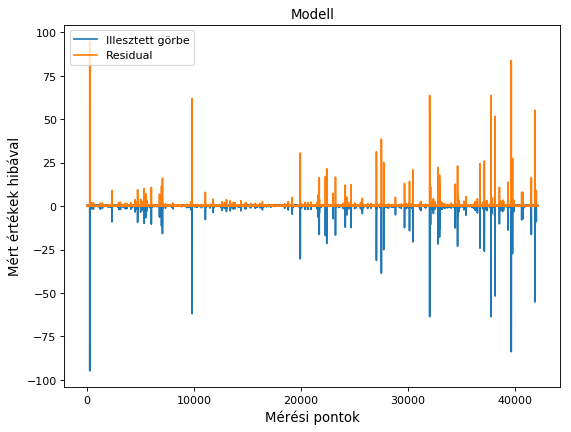

In [62]:
a = result[0]
M = result[1]
khi2 = result[3]
khi2_redukalt = result[4]
residual = result[5]

def plot_fit(x, residual, a, M, title_string, legend=True):
    plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.plot(x,np.dot(M,a), label='Illesztett görbe')
    plt.plot(x,residual, label='Residual')
    
    plt.title(title_string)
    plt.xlabel('Mérési pontok', fontsize = '12')
    plt.ylabel('Mért értékek hibával', fontsize = '12')
    
    if(legend==True):
        plt.legend(loc='upper left')
    
x = np.linspace(0, np.shape(data[:,0])[0], np.shape(data[:,0])[0])
plot_fit(x, residual, a, M, "Modell")
khi2, khi2_redukalt